In [36]:
import pandas as pd 
import numpy as np
import requests
from bs4 import BeautifulSoup
import csv
import matplotlib.pyplot as plt
import chardet
%matplotlib inline
import platform

if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    plt.rc('font', family='AppleGothic')
else: #linux
    plt.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
plt.rcParams['axes.unicode_minus'] = False


In [38]:
df = pd.read_csv('police_2.csv', encoding='cp949', index_col=["죄종별"])
test_cpi=pd.read_excel('소비자물가지수.xlsx')
cyber_crime = pd.read_csv("CyberCrime.csv",index_col=['연도'], thousands = ',',encoding='UTF-8')

In [40]:
df

,항목,2018,2019,2020,2021,2022
죄종별,,,,,,
사기,발생건수[건],270029,304472,347675,294075,325848
전자금융거래법위반,발생건수[건],7877,8132,6402,7024,9731
횡령,발생건수[건],55113,58508,58889,50421,60220
도박범죄,발생건수[건],6004,8008,8135,6391,4463


In [41]:
#죄종별에서 도박범죄만 남기고 나머지 삭제
#항목 열 삭제

df_crime = df.drop(columns="항목")
df_crime

,2018,2019,2020,2021,2022
죄종별,,,,,
사기,270029,304472,347675,294075,325848
전자금융거래법위반,7877,8132,6402,7024,9731
횡령,55113,58508,58889,50421,60220
도박범죄,6004,8008,8135,6391,4463


In [42]:
#죄종별 삭제
df_crime = df_crime.rename_axis(index={"죄종별":""})
df_crime

,2018,2019,2020,2021,2022
,,,,,
사기,270029,304472,347675,294075,325848
전자금융거래법위반,7877,8132,6402,7024,9731
횡령,55113,58508,58889,50421,60220
도박범죄,6004,8008,8135,6391,4463


In [43]:
df_crime.columns.name='연도'
df_crime=df_crime.transpose()
df_crime

,사기,전자금융거래법위반,횡령,도박범죄
연도,,,,
2018,270029,7877,55113,6004
2019,304472,8132,58508,8008
2020,347675,6402,58889,8135
2021,294075,7024,50421,6391
2022,325848,9731,60220,4463


In [7]:
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 2018 to 2022
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   사기         5 non-null      int64
 1   전자금융거래법위반  5 non-null      int64
 2   횡령         5 non-null      int64
 3   도박범죄       5 non-null      int64
dtypes: int64(4)
memory usage: 372.0+ bytes


In [44]:
cyber_crime = cyber_crime.iloc[::2]
cyber_crime

,구 분,총 계,소계,해킹,DDoS,악성프로그램,기타,소계.1,사이버사기,사이버금융범죄,개인위치정보침해,사이버저작권침해,기타.1,소계.2,사이버성폭력,사이버도박,사이버명예훼손모욕,기타.2
연도,,,,,,,,,,,,,,,,,,
2018,발생,149604,2888,2178,20,119,571,123677,112000,5621,246,3856,1954,23039,3833,3012,15926,268
2019,발생,180499,3638,2664,35,270,669,151916,136074,10542,179,2562,2559,24945,2690,5346,16633,276
2020,발생,234098,4344,3176,25,169,974,199594,174328,20248,241,2183,2594,30160,4831,5692,19388,249
2021,발생,217807,3845,2839,14,157,835,174648,141154,28123,217,2423,2767,39278,4349,5505,28988,436
2022,발생,230355,3494,2396,30,185,883,190958,155715,28546,247,3302,3148,35903,3201,2997,29258,447


In [48]:
cyber_crime_occur = cyber_crime.iloc[:,[9,15]]
cyber_crime_occur

,사이버금융범죄,사이버도박
연도,,
2018,5621,3012
2019,10542,5346
2020,20248,5692
2021,28123,5505
2022,28546,2997


In [49]:
df_crime.index = df_crime.index.astype(int)

In [50]:
#cyber_crime = 범죄통계 + 사이버범죄
cyber_crime = pd.concat([df_crime, cyber_crime_occur], axis = 1)
cyber_crime

,사기,전자금융거래법위반,횡령,도박범죄,사이버금융범죄,사이버도박
연도,,,,,,
2018,270029,7877,55113,6004,5621,3012
2019,304472,8132,58508,8008,10542,5346
2020,347675,6402,58889,8135,20248,5692
2021,294075,7024,50421,6391,28123,5505
2022,325848,9731,60220,4463,28546,2997


Text(0.5, 1.0, '금융범죄 통계')

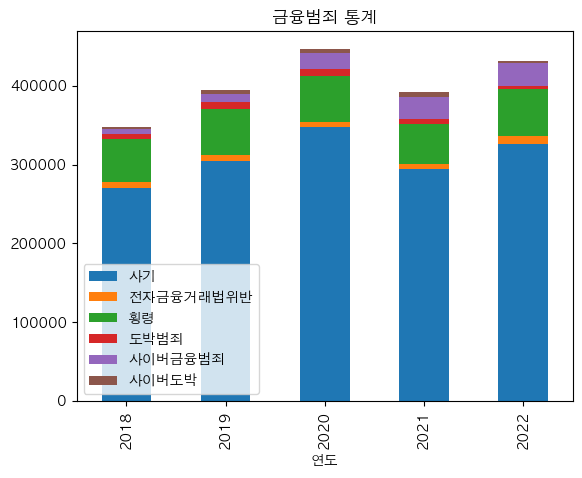

In [52]:
cyber_crime.plot(kind='bar', stacked=True)
plt.title('금융범죄 통계')

In [53]:
#df_crime['도박범죄'] = df_crime['도박범죄'].astype('float64')
#df_crime.info()
#Dtype을 통일시켜주지 않아도 정상적으로 결과 출력됨

In [54]:
test_cpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연도      15 non-null     object 
 1   2012    15 non-null     object 
 2   2013    14 non-null     float64
 3   2014    14 non-null     float64
 4   2015    14 non-null     float64
 5   2016    14 non-null     float64
 6   2017    14 non-null     float64
 7   2018    14 non-null     float64
 8   2019    14 non-null     float64
 9   2020    14 non-null     float64
 10  2021    14 non-null     float64
 11  2022    14 non-null     float64
dtypes: float64(10), object(2)
memory usage: 1.7+ KB


In [55]:
cpi = test_cpi.iloc[0:2, [7, 8, 9, 10, 11]]
cpi

,2018,2019,2020,2021,2022
0,99.1,99.5,100.0,102.5,107.7
1,1.5,0.4,0.5,2.5,5.1


In [56]:
cpi_columns=cpi.columns
first_row=cpi.iloc[0]
print(first_row)
second_row=cpi.iloc[1]
print(second_row)

2018     99.1
2019     99.5
2020    100.0
2021    102.5
2022    107.7
Name: 0, dtype: float64
2018    1.5
2019    0.4
2020    0.5
2021    2.5
2022    5.1
Name: 1, dtype: float64


In [57]:
df_cpi = pd.DataFrame([first_row.values, second_row.values],index=["소비자물가 총지수(2020=100)","소비자물가상승률(%)"],columns=cpi.columns)
df_cpi

,2018,2019,2020,2021,2022
소비자물가 총지수(2020=100),99.1,99.5,100.0,102.5,107.7
소비자물가상승률(%),1.5,0.4,0.5,2.5,5.1


In [58]:
df_cpi.columns.name='연도'
df_cpi=df_cpi.transpose()
df_cpi

,소비자물가 총지수(2020=100),소비자물가상승률(%)
연도,,
2018,99.1,1.5
2019,99.5,0.4
2020,100.0,0.5
2021,102.5,2.5
2022,107.7,5.1


In [59]:
print(df_crime.index)
print(df_cpi.index)

Int64Index([2018, 2019, 2020, 2021, 2022], dtype='int64', name='연도')
Index([2018, 2019, 2020, 2021, 2022], dtype='object', name='연도')


In [60]:
# 연도별의 인덱스가 crime = 문자, cpi = 숫자 형태로 서로 다르므로 crime을 정수형으로 변환
df_crime.index = df_crime.index.astype(int)

In [61]:
cpi_crime = pd.concat([df_cpi, df_crime], axis=1)
cpi_crime

,소비자물가 총지수(2020=100),소비자물가상승률(%),사기,전자금융거래법위반,횡령,도박범죄
연도,,,,,,
2018,99.1,1.5,270029,7877,55113,6004
2019,99.5,0.4,304472,8132,58508,8008
2020,100.0,0.5,347675,6402,58889,8135
2021,102.5,2.5,294075,7024,50421,6391
2022,107.7,5.1,325848,9731,60220,4463


In [62]:
cpi_crime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 2018 to 2022
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   소비자물가 총지수(2020=100)  5 non-null      float64
 1   소비자물가상승률(%)          5 non-null      float64
 2   사기                   5 non-null      int64  
 3   전자금융거래법위반            5 non-null      int64  
 4   횡령                   5 non-null      int64  
 5   도박범죄                 5 non-null      int64  
dtypes: float64(2), int64(4)
memory usage: 452.0+ bytes


In [63]:
cpi_crime.isnull().sum()

소비자물가 총지수(2020=100)    0
소비자물가상승률(%)            0
사기                     0
전자금융거래법위반              0
횡령                     0
도박범죄                   0
dtype: int64

In [64]:
cpi_crime.describe()

,소비자물가 총지수(2020=100),소비자물가상승률(%),사기,전자금융거래법위반,횡령,도박범죄
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,101.760000,2.000000,308419.800000,7833.200000,56630.200000,6600.200000
std,3.574633,1.931321,29748.633661,1264.514017,3948.766732,1525.152025
min,99.100000,0.400000,270029.000000,6402.000000,50421.000000,4463.000000
25%,99.500000,0.500000,294075.000000,7024.000000,55113.000000,6004.000000
50%,100.000000,1.500000,304472.000000,7877.000000,58508.000000,6391.000000
75%,102.500000,2.500000,325848.000000,8132.000000,58889.000000,8008.000000
max,107.700000,5.100000,347675.000000,9731.000000,60220.000000,8135.000000


In [65]:
cpi_crime.corr(method='pearson')
#상승률(일반범죄)금융거래위반의 경우 비교적 강한 양의 상관관계를 띔(0.65정도 차이)소비자물가지수 상승률이 높아질수록 전자금융거래법위반 횟수가 증가한다
#도박범죄 음의 상관관계를 가지기때문에 소비자물가지수가 상승하지만 오히려 범죄 발생 횟수는 감소한다.
#대체적으로 금융범죄는 소비자물가지수와 양의 상관관계를 갖는다고 해석할 수 있다.
#횡령도 유의미한 양의 상관관계를 보였어야 했으나 예상했던 수치와는 다르게 0에 가까운 상관계수가 나와 결론적으로 유의미한 상관관계를 보이지 않아 횡령과 금융지수 상관성 예측에 실패했다고 볼 수 있다.

,소비자물가 총지수(2020=100),소비자물가상승률(%),사기,전자금융거래법위반,횡령,도박범죄
소비자물가 총지수(2020=100),1.000000,0.954914,0.317050,0.685883,0.222187,-0.786280
소비자물가상승률(%),0.954914,1.000000,0.058673,0.729409,0.078337,-0.932463
사기,0.317050,0.058673,1.000000,-0.095435,0.619595,0.238770
전자금융거래법위반,0.685883,0.729409,-0.095435,1.000000,0.455565,-0.737430
횡령,0.222187,0.078337,0.619595,0.455565,1.000000,0.026641
도박범죄,-0.786280,-0.932463,0.238770,-0.737430,0.026641,1.000000


<Axes: xlabel='소비자물가 총지수(2020=100)', ylabel='사기'>

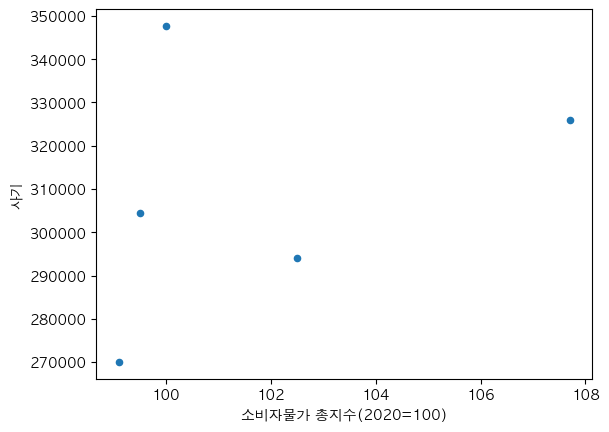

In [66]:
cpi_crime.plot(kind='scatter', x='소비자물가 총지수(2020=100)', y='사기')

<Axes: xlabel='소비자물가상승률(%)', ylabel='사기'>

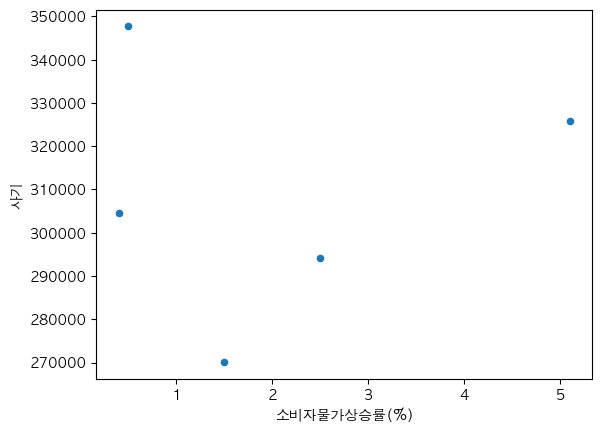

In [67]:
cpi_crime.plot(kind='scatter', x='소비자물가상승률(%)', y='사기')

<Axes: xlabel='소비자물가 총지수(2020=100)', ylabel='전자금융거래법위반'>

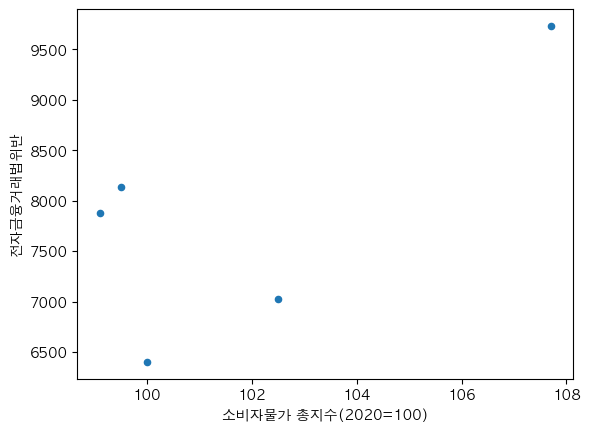

In [68]:
cpi_crime.plot(kind='scatter', x='소비자물가 총지수(2020=100)', y='전자금융거래법위반')

<Axes: xlabel='소비자물가상승률(%)', ylabel='전자금융거래법위반'>

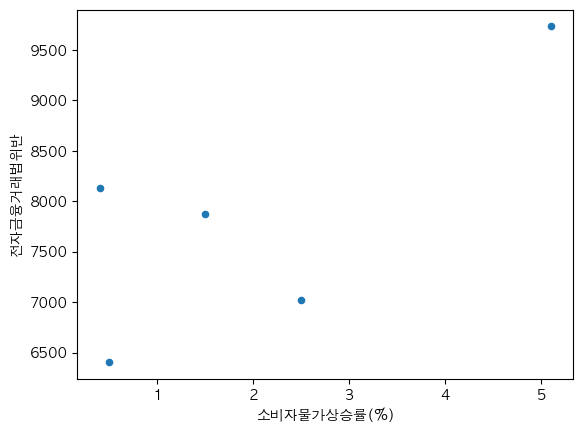

In [69]:
cpi_crime.plot(kind='scatter', x='소비자물가상승률(%)', y='전자금융거래법위반')

<Axes: xlabel='소비자물가 총지수(2020=100)', ylabel='횡령'>

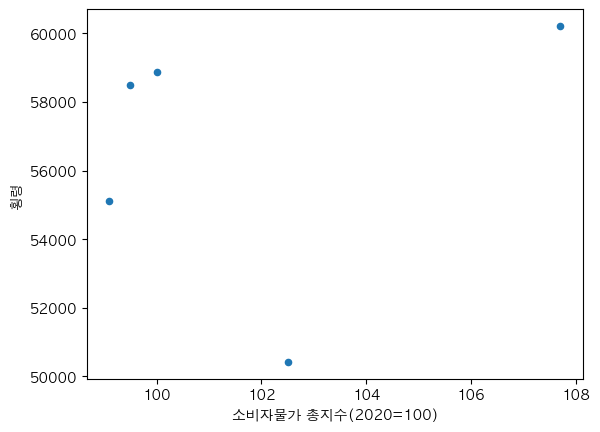

In [70]:
cpi_crime.plot(kind='scatter', x='소비자물가 총지수(2020=100)', y='횡령')

<Axes: xlabel='소비자물가상승률(%)', ylabel='횡령'>

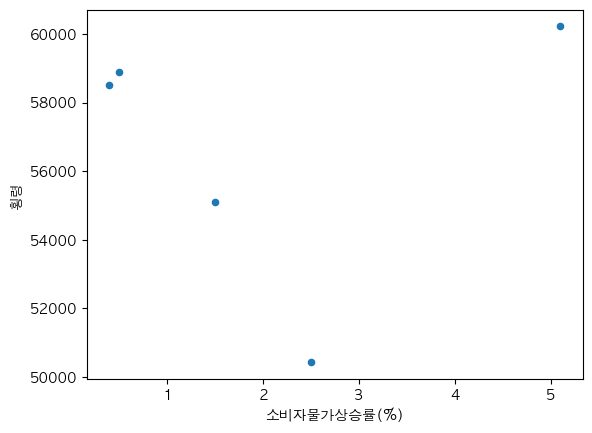

In [71]:
cpi_crime.plot(kind='scatter', x='소비자물가상승률(%)', y='횡령')

<Axes: xlabel='소비자물가 총지수(2020=100)', ylabel='도박범죄'>

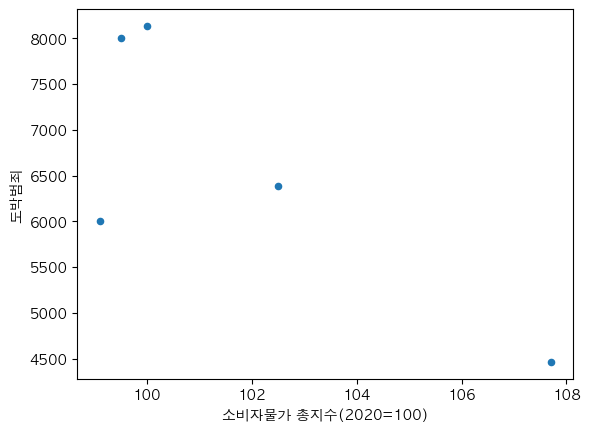

In [72]:
cpi_crime.plot(kind='scatter', x='소비자물가 총지수(2020=100)', y='도박범죄')

<Axes: xlabel='소비자물가상승률(%)', ylabel='도박범죄'>

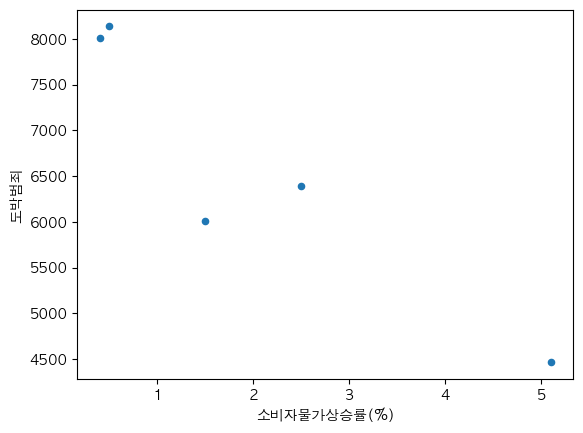

In [73]:
cpi_crime.plot(kind='scatter', x='소비자물가상승률(%)', y='도박범죄')

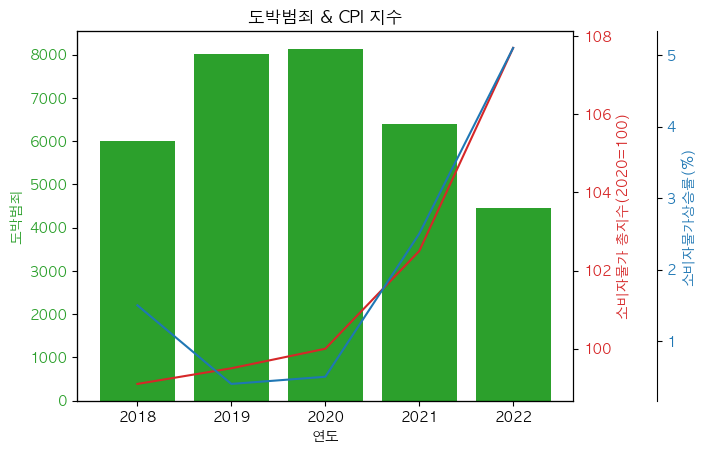

In [74]:
# '연도'는 열이 아닌 인덱스의 이름
# cpi_crime.index를 사용하여 인덱스 값을 x축 데이터로 사용

fig, ax1 = plt.subplots()

color = 'tab:green'
ax1.set_xlabel('연도')
ax1.set_ylabel('도박범죄', color=color)
ax1.bar(cpi_crime.index, cpi_crime['도박범죄'], color=color)  
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('소비자물가 총지수(2020=100)', color=color)  
ax2.plot(cpi_crime.index, cpi_crime['소비자물가 총지수(2020=100)'], color=color)  
ax2.tick_params(axis='y', labelcolor=color)

ax3 = ax1.twinx()  
color = 'tab:blue'
ax3.spines['right'].set_position(('outward', 60))  # 두 번째 y축을 오른쪽에 추가
ax3.set_ylabel('소비자물가상승률(%)', color=color)  
ax3.plot(cpi_crime.index, cpi_crime['소비자물가상승률(%)'], color=color)  
ax3.tick_params(axis='y', labelcolor=color)

plt.title('도박범죄 & CPI 지수')

plt.show()

In [75]:
#final = cyber_crime(사이버 + 금융) + cpi
final = pd.concat([cyber_crime, df_cpi], axis = 1)
final

,사기,전자금융거래법위반,횡령,도박범죄,사이버금융범죄,사이버도박,소비자물가 총지수(2020=100),소비자물가상승률(%)
연도,,,,,,,,
2018,270029,7877,55113,6004,5621,3012,99.1,1.5
2019,304472,8132,58508,8008,10542,5346,99.5,0.4
2020,347675,6402,58889,8135,20248,5692,100.0,0.5
2021,294075,7024,50421,6391,28123,5505,102.5,2.5
2022,325848,9731,60220,4463,28546,2997,107.7,5.1


In [76]:
final.corr(method='pearson')

,사기,전자금융거래법위반,횡령,도박범죄,사이버금융범죄,사이버도박,소비자물가 총지수(2020=100),소비자물가상승률(%)
사기,1.000000,-0.095435,0.619595,0.238770,0.514432,0.365139,0.317050,0.058673
전자금융거래법위반,-0.095435,1.000000,0.455565,-0.737430,0.111817,-0.742605,0.685883,0.729409
횡령,0.619595,0.455565,1.000000,0.026641,-0.092932,-0.233813,0.222187,0.078337
도박범죄,0.238770,-0.737430,0.026641,1.000000,-0.386509,0.820643,-0.786280,-0.932463
사이버금융범죄,0.514432,0.111817,-0.092932,-0.386509,1.000000,0.159450,0.786128,0.658800
사이버도박,0.365139,-0.742605,-0.233813,0.820643,0.159450,1.000000,-0.417345,-0.614743
소비자물가 총지수(2020=100),0.317050,0.685883,0.222187,-0.786280,0.786128,-0.417345,1.000000,0.954914
소비자물가상승률(%),0.058673,0.729409,0.078337,-0.932463,0.658800,-0.614743,0.954914,1.000000
